# 24BAD099 - Rithish A

First 5 rows:
    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usag

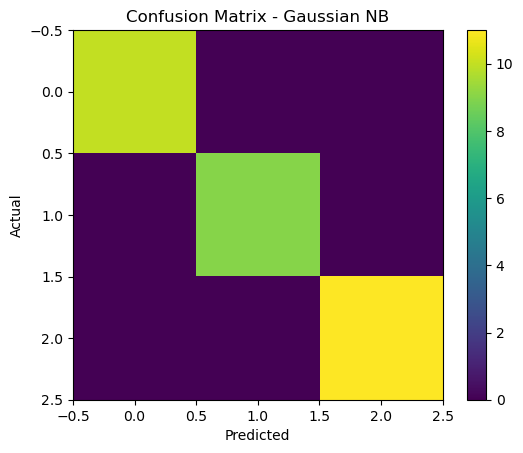

<Figure size 640x480 with 0 Axes>

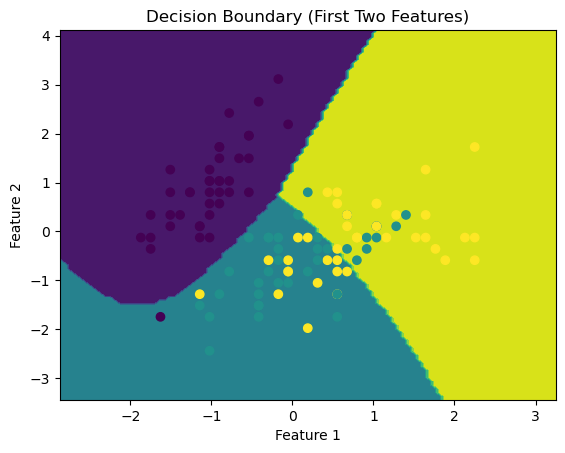

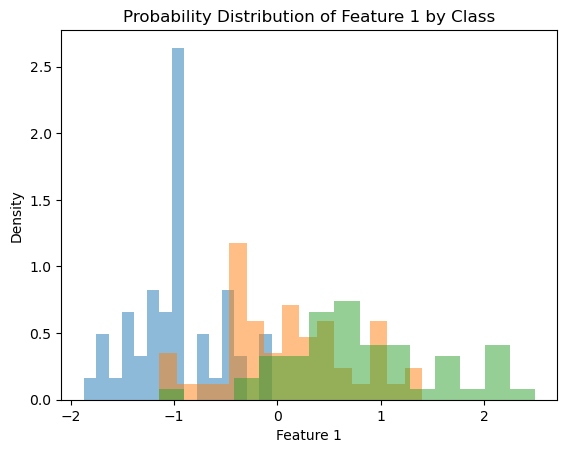

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.inspection import DecisionBoundaryDisplay

df = pd.read_csv("Iris.csv")

print("First 5 rows:\n", df.head())
print("\nDataset Info:\n")
print(df.info())

if "Id" in df.columns:
    df = df.drop("Id", axis=1)

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

le = LabelEncoder()
y = le.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

print("\nGaussian NB Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

comparison = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print("\nActual vs Predicted:\n", comparison.head())

probs = gnb.predict_proba(X_test)
print("\nClass Probabilities (first 5 samples):\n", probs[:5])

lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("\nLogistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

cm = confusion_matrix(y_test, y_pred)

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix - Gaussian NB")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.show()

X_two = X_scaled[:, :2]
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_two, y, test_size=0.2, random_state=42
)

gnb2 = GaussianNB()
gnb2.fit(X_train2, y_train2)

plt.figure()
DecisionBoundaryDisplay.from_estimator(
    gnb2, X_train2, response_method="predict"
)
plt.scatter(X_train2[:, 0], X_train2[:, 1], c=y_train2)
plt.title("Decision Boundary (First Two Features)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

plt.figure()
for class_value in np.unique(y):
    plt.hist(
        X_scaled[y == class_value, 0],
        bins=15,
        alpha=0.5,
        density=True
    )
plt.title("Probability Distribution of Feature 1 by Class")
plt.xlabel("Feature 1")
plt.ylabel("Density")
plt.show()